# Lab 5: Loan Approval Prediction (Evaluable)

# Lab Goals:
In this project, we will develop and apply supervised classification methods to predict loan approval. 

We will follow the end-to-end **Machine Learning process** for a **financial risk use case**:
1.  **Data Understanding and Preparation**: Exploration of the dataset (EDA), feature engineering (missing values, categorical variables management).
2.  **Model Training**: Training a **Logistic Regression** model.
3.  **Model Evaluation & Business Insights**: Analysis of metrics (confusion matrix, precision, recall, density chart). We will analyze how to adjust the model's cut-off based on business goals and how to improve the model.

# Practice Information:

**Due date:** By end of October, 24th (23:59h)

**Submission procedure:** via Moodle.

**Name:** Cinta Carot Gracia

**NIA:** 254576

## Part 0: Setup & Data Loading

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

### Load Data

In [82]:
df = pd.read_csv('loan_dataset.csv')

**Dataset description:**
- Loan_ID: A unique identification number for each loan application.
- Gender: The applicant's gender (e.g., Male, Female).
- Married: The applicant's marital status (e.g., Yes, No).
- Dependents: The number of dependents (e.g., children or other family members) the applicant has (e.g., 0, 1, 2, 3+).
- Education: The applicant's highest level of education (e.g., Graduate, Not Graduate).
- Self_Employed: Whether the applicant is self-employed (e.g., Yes, No).
- ApplicantIncome: The applicant's monthly income.
- CoapplicantIncome: The co-applicant's monthly income (if one exists, otherwise 0).
- LoanAmount: The total amount of the loan requested (in thousands).
- Loan_Amount_Term: The duration of the loan in months (e.g., 360 months = 30 years).
- Credit_History: A binary flag indicating if the applicant has a credit history that meets the bank's guidelines (1.0 = Yes, 0.0 = No).
- Property_Area: The type of area where the property is located (e.g., Urban, Semiurban, Rural).
- Loan_Status: (This is the target variable) The final decision on the loan application (Y = Approved, N = Rejected).

## Part 1: Exploratory Data Analysis (EDA)

### EX1: Initial Data Inspection

Get a first look at the data. Answer the questions:
- How many total rows (applicants) and columns (features) are in this dataset?
- Look at the Non-Null Count for all columns. Which columns have missing (null) values?
- What is the data type (Dtype) of the Credit_History column and the ApplicantIncome column?
- Look at the first 5 rows of data. What is our target variable (the column we want to predict), and what are its possible values?
- What is the average ApplicantIncome?
- Look at the min, max, and mean for the Credit_History column. What does this tell you about the data in this column?

With the following code cell, we can obtain some of the answers to the questions above:

In [83]:
print(f"Dataset information:")
df.info()
print(f"----------------------------------------------")
print(f"First 5 elements in the dataset:")
display(df.head())
print(f"----------------------------------------------")
print(f"Dataset description:")
df.describe()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
----------------------------------------------
First 5 elements in the dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


----------------------------------------------
Dataset description:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Answers:
- Total rows (applicants): 614, Total columns (features): 13
- The columns with missing (null) values are the ones that have less than 614 records, these are: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History
- The data type corresponds to the Dtype column of `.info()` function: the Credit_History data type is float64 and the ApplicantIncome data type is int64
- The target variable is Loan_Status, and its possible values are Y (Approved) and N (Rejected)
- The average ApplicantIncome is 5403.459283
- The min, max and mean for the Credit_History column are 0.0, 1.0 and 0.842199, respectively. This tells us that most of the applicants have a credit history that meets the bank's guidelines (since the mean is close to 1.0)

### EX2: Analyze the Target Variable

Our target variable is `Loan_Status`. 
1.  Use `seaborn.countplot` to visualize the distribution of `Loan_Status`.
2.  Print the value counts the proportion.
3.  Is the dataset balanced or imbalanced?

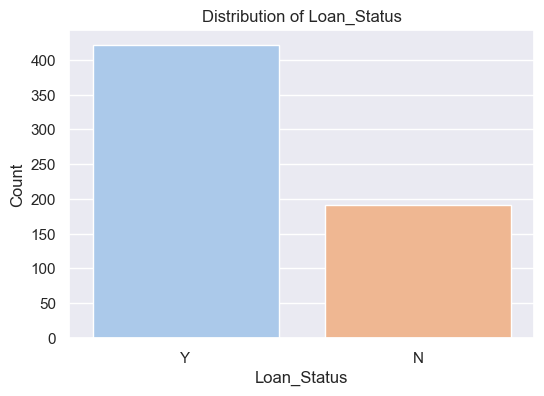

Counts:
Loan_Status
Y    422
N    192
Name: count, dtype: int64

Proportions:
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [84]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Loan_Status', palette='pastel')
plt.title('Distribution of Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

print("Counts:")
print(df['Loan_Status'].value_counts())
print("\nProportions:")
print(df['Loan_Status'].value_counts(normalize=True))

The dataset is imbalanced, since the number of approved loans (Y) is significantly higher than the number of rejected loans (N). 

### EX3: Visualize all features vs our target to understand the data

Let's understand the data and its relation to our target.

In order to do so, apply all we have learnt to to understand the numerical and categorical columns.

At the end answer the questions.

In [85]:
target_variable = ["Loan_Status"]

numerical_variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_variables = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When

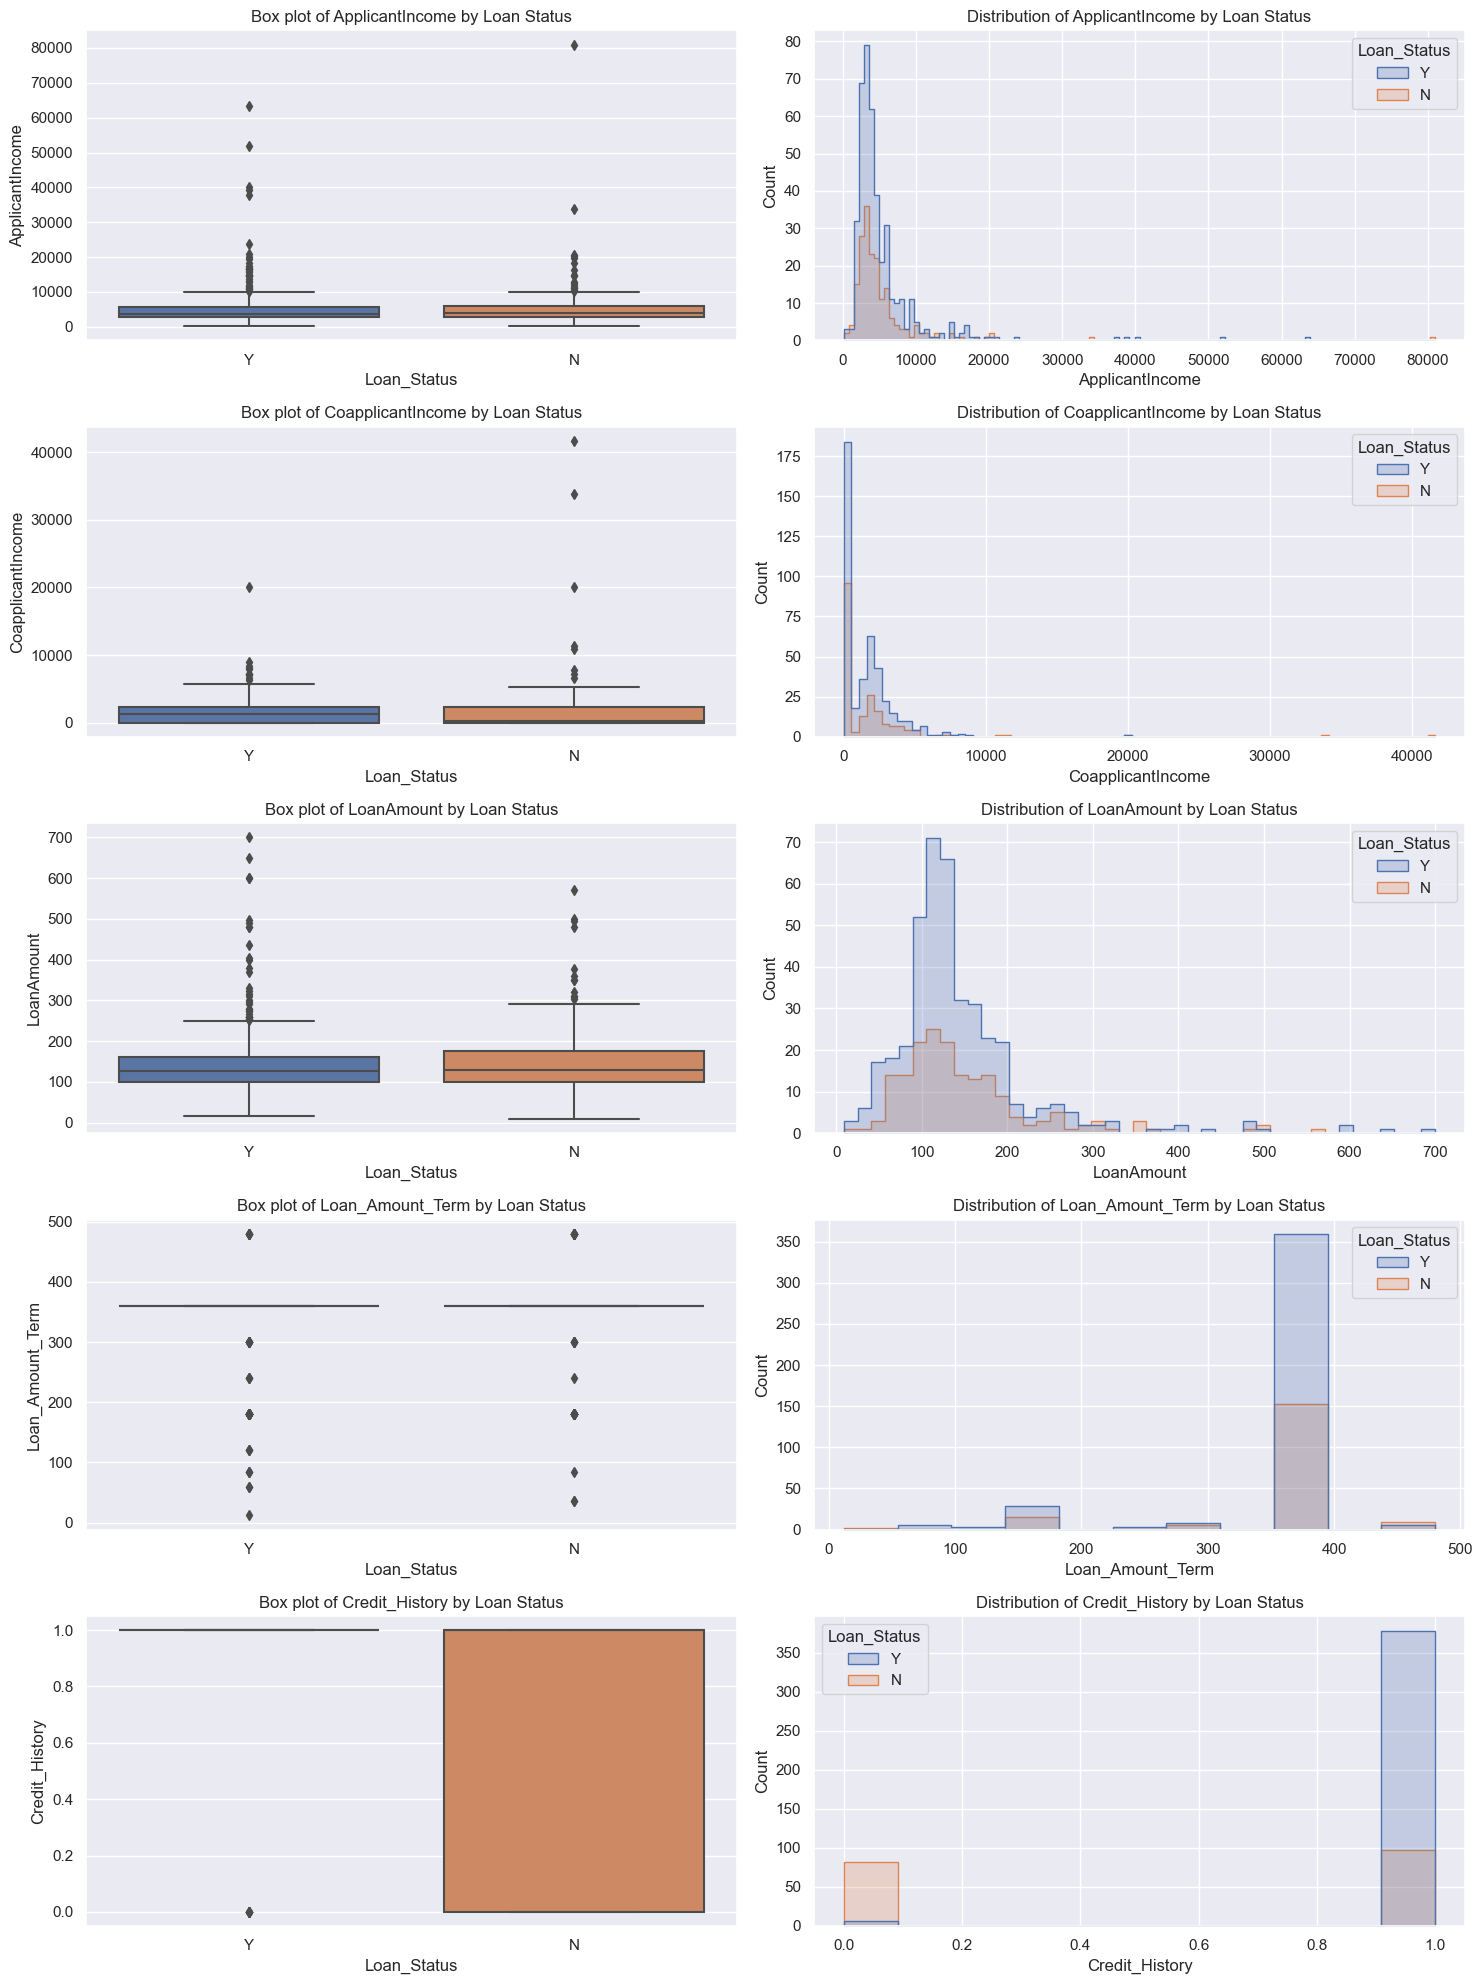

In [86]:
# Create plots for numerical variables
plt.figure(figsize=(15, 20))

# Create plots for each numerical variable
for i, column in enumerate(numerical_variables):
    # Create subplot
    plt.subplot(len(numerical_variables), 2, 2*i + 1)
    sns.boxplot(x='Loan_Status', y=column, data=df)
    plt.title(f'Box plot of {column} by Loan Status')
    
    plt.subplot(len(numerical_variables), 2, 2*i + 2)
    sns.histplot(data=df, x=column, hue='Loan_Status', element='step')
    plt.title(f'Distribution of {column} by Loan Status')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

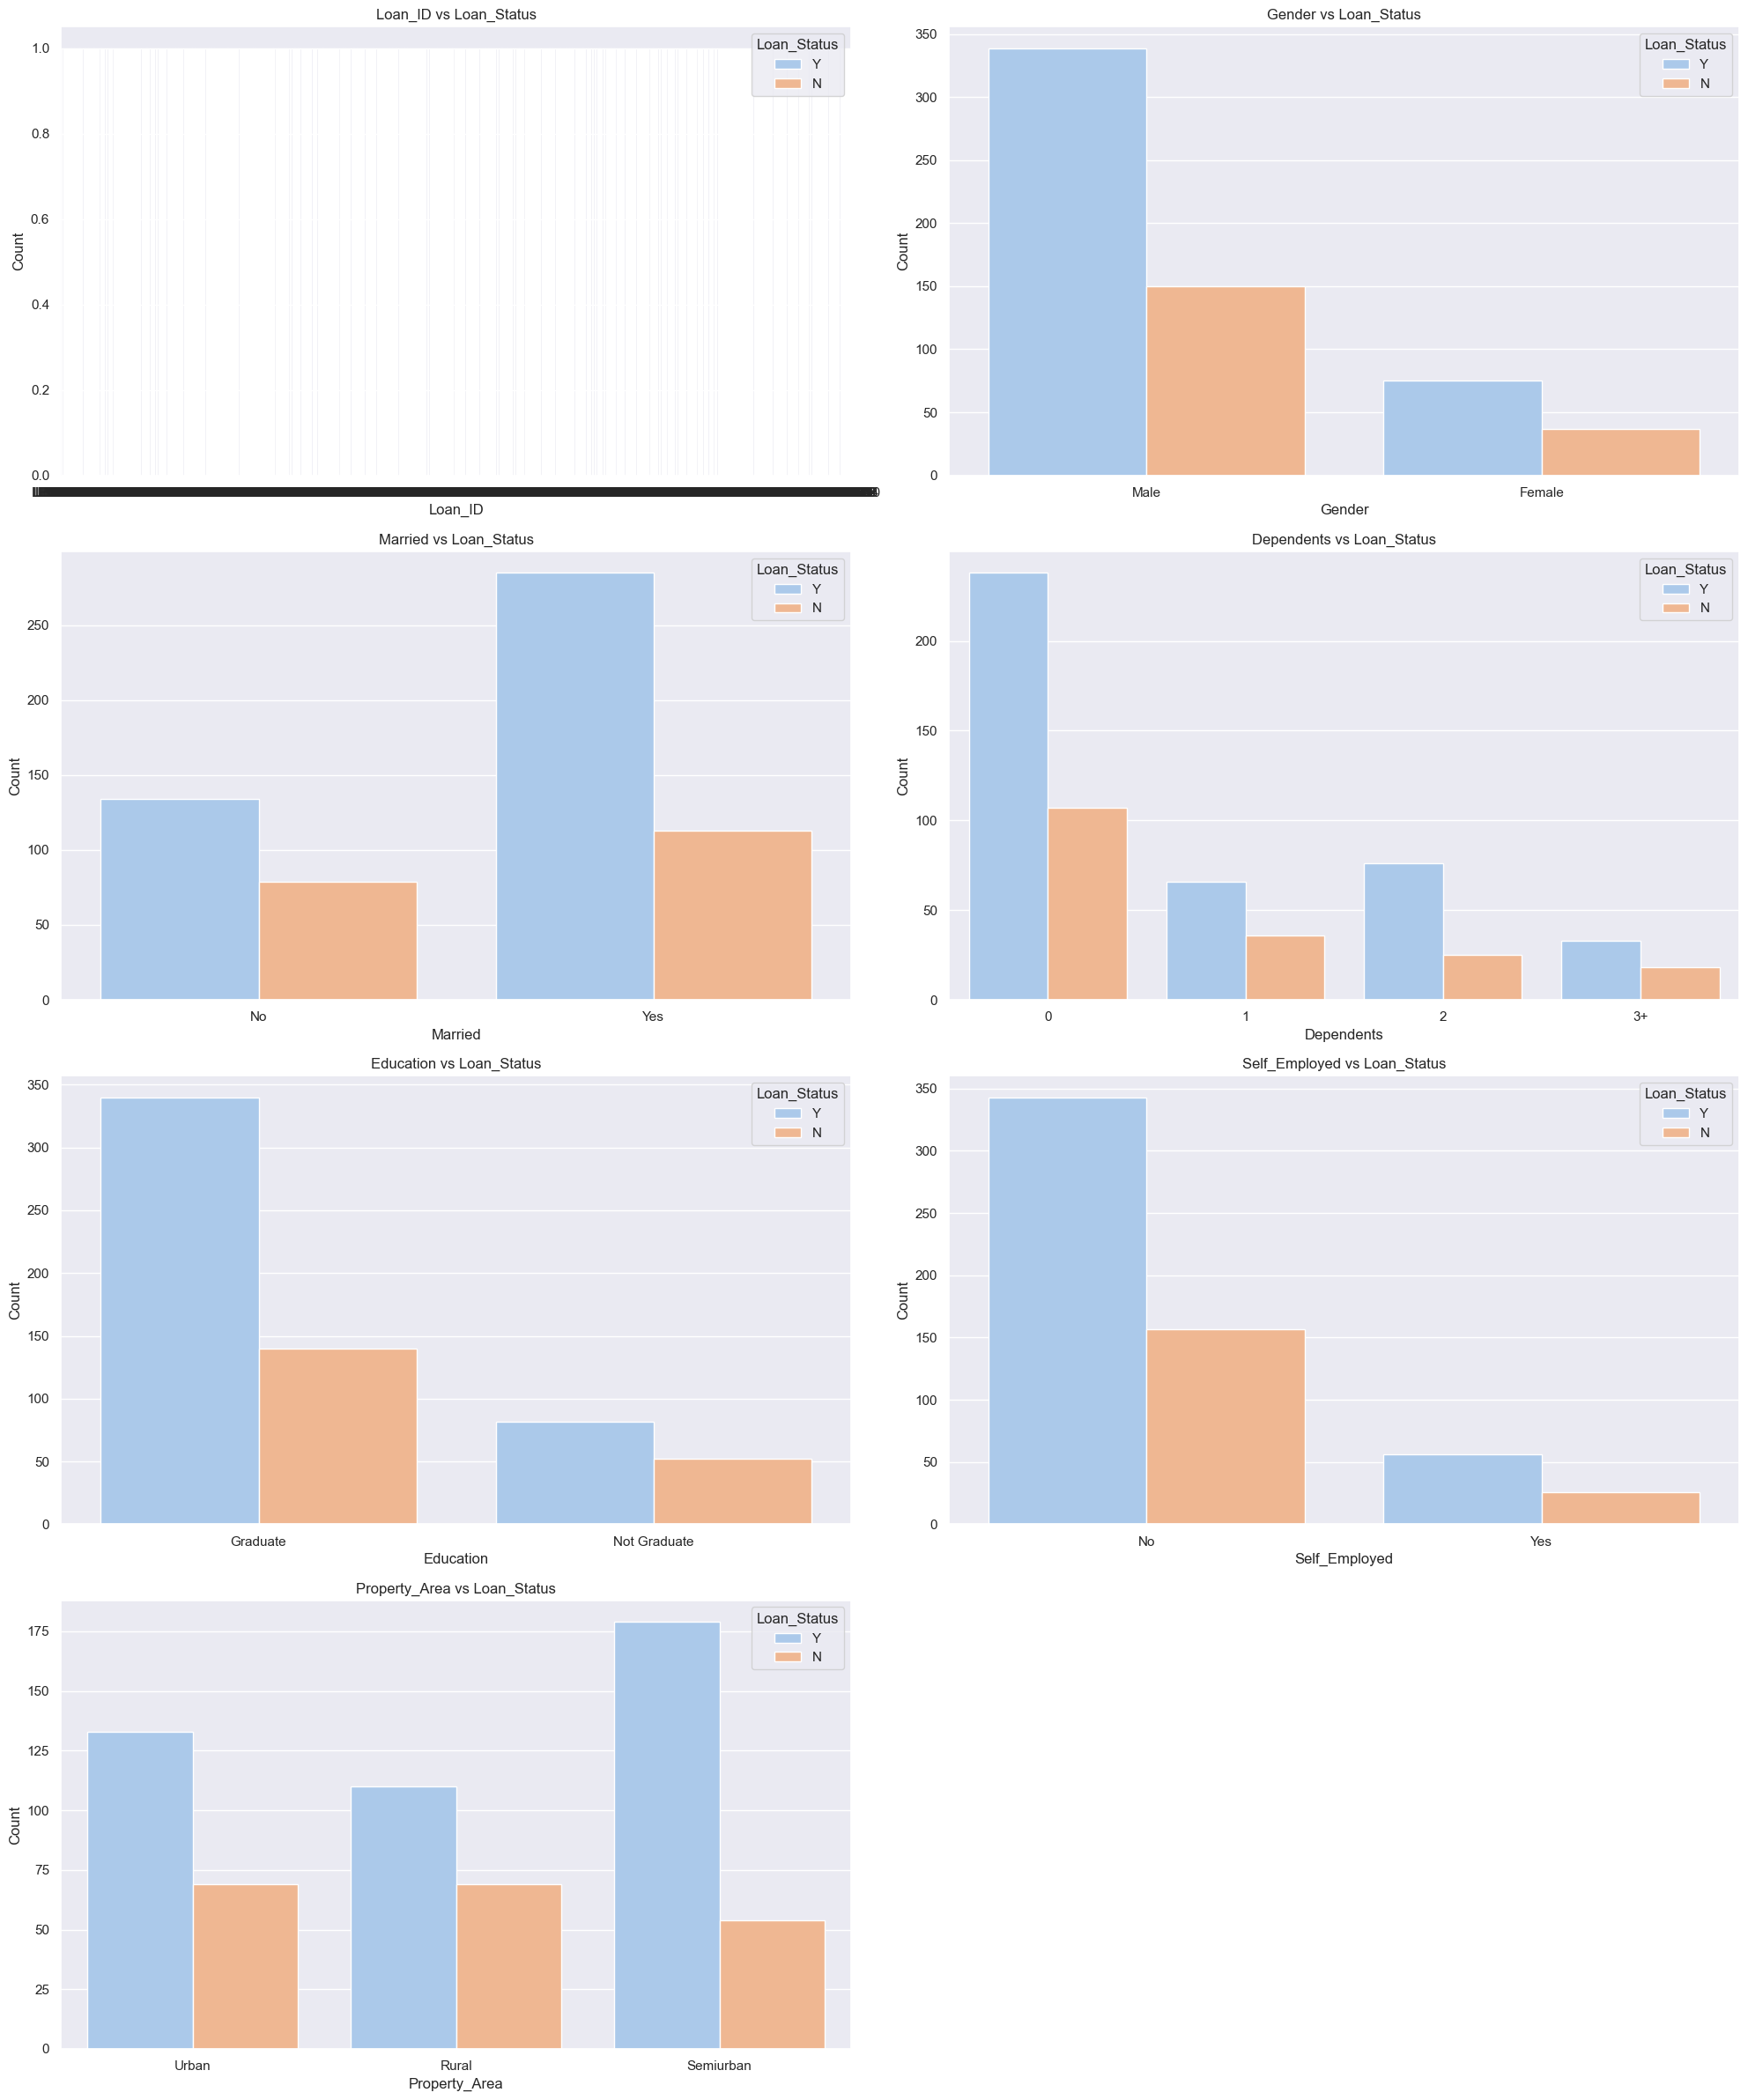

In [88]:
plt.figure(figsize=(20, 24))
for idx, col in enumerate(categorical_variables):
    plt.subplot(4, 2, idx + 1)
    sns.countplot(data=df, x=col, hue='Loan_Status', palette='pastel')
    plt.title(f'{col} vs Loan_Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status')
plt.tight_layout()
plt.show()

c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When

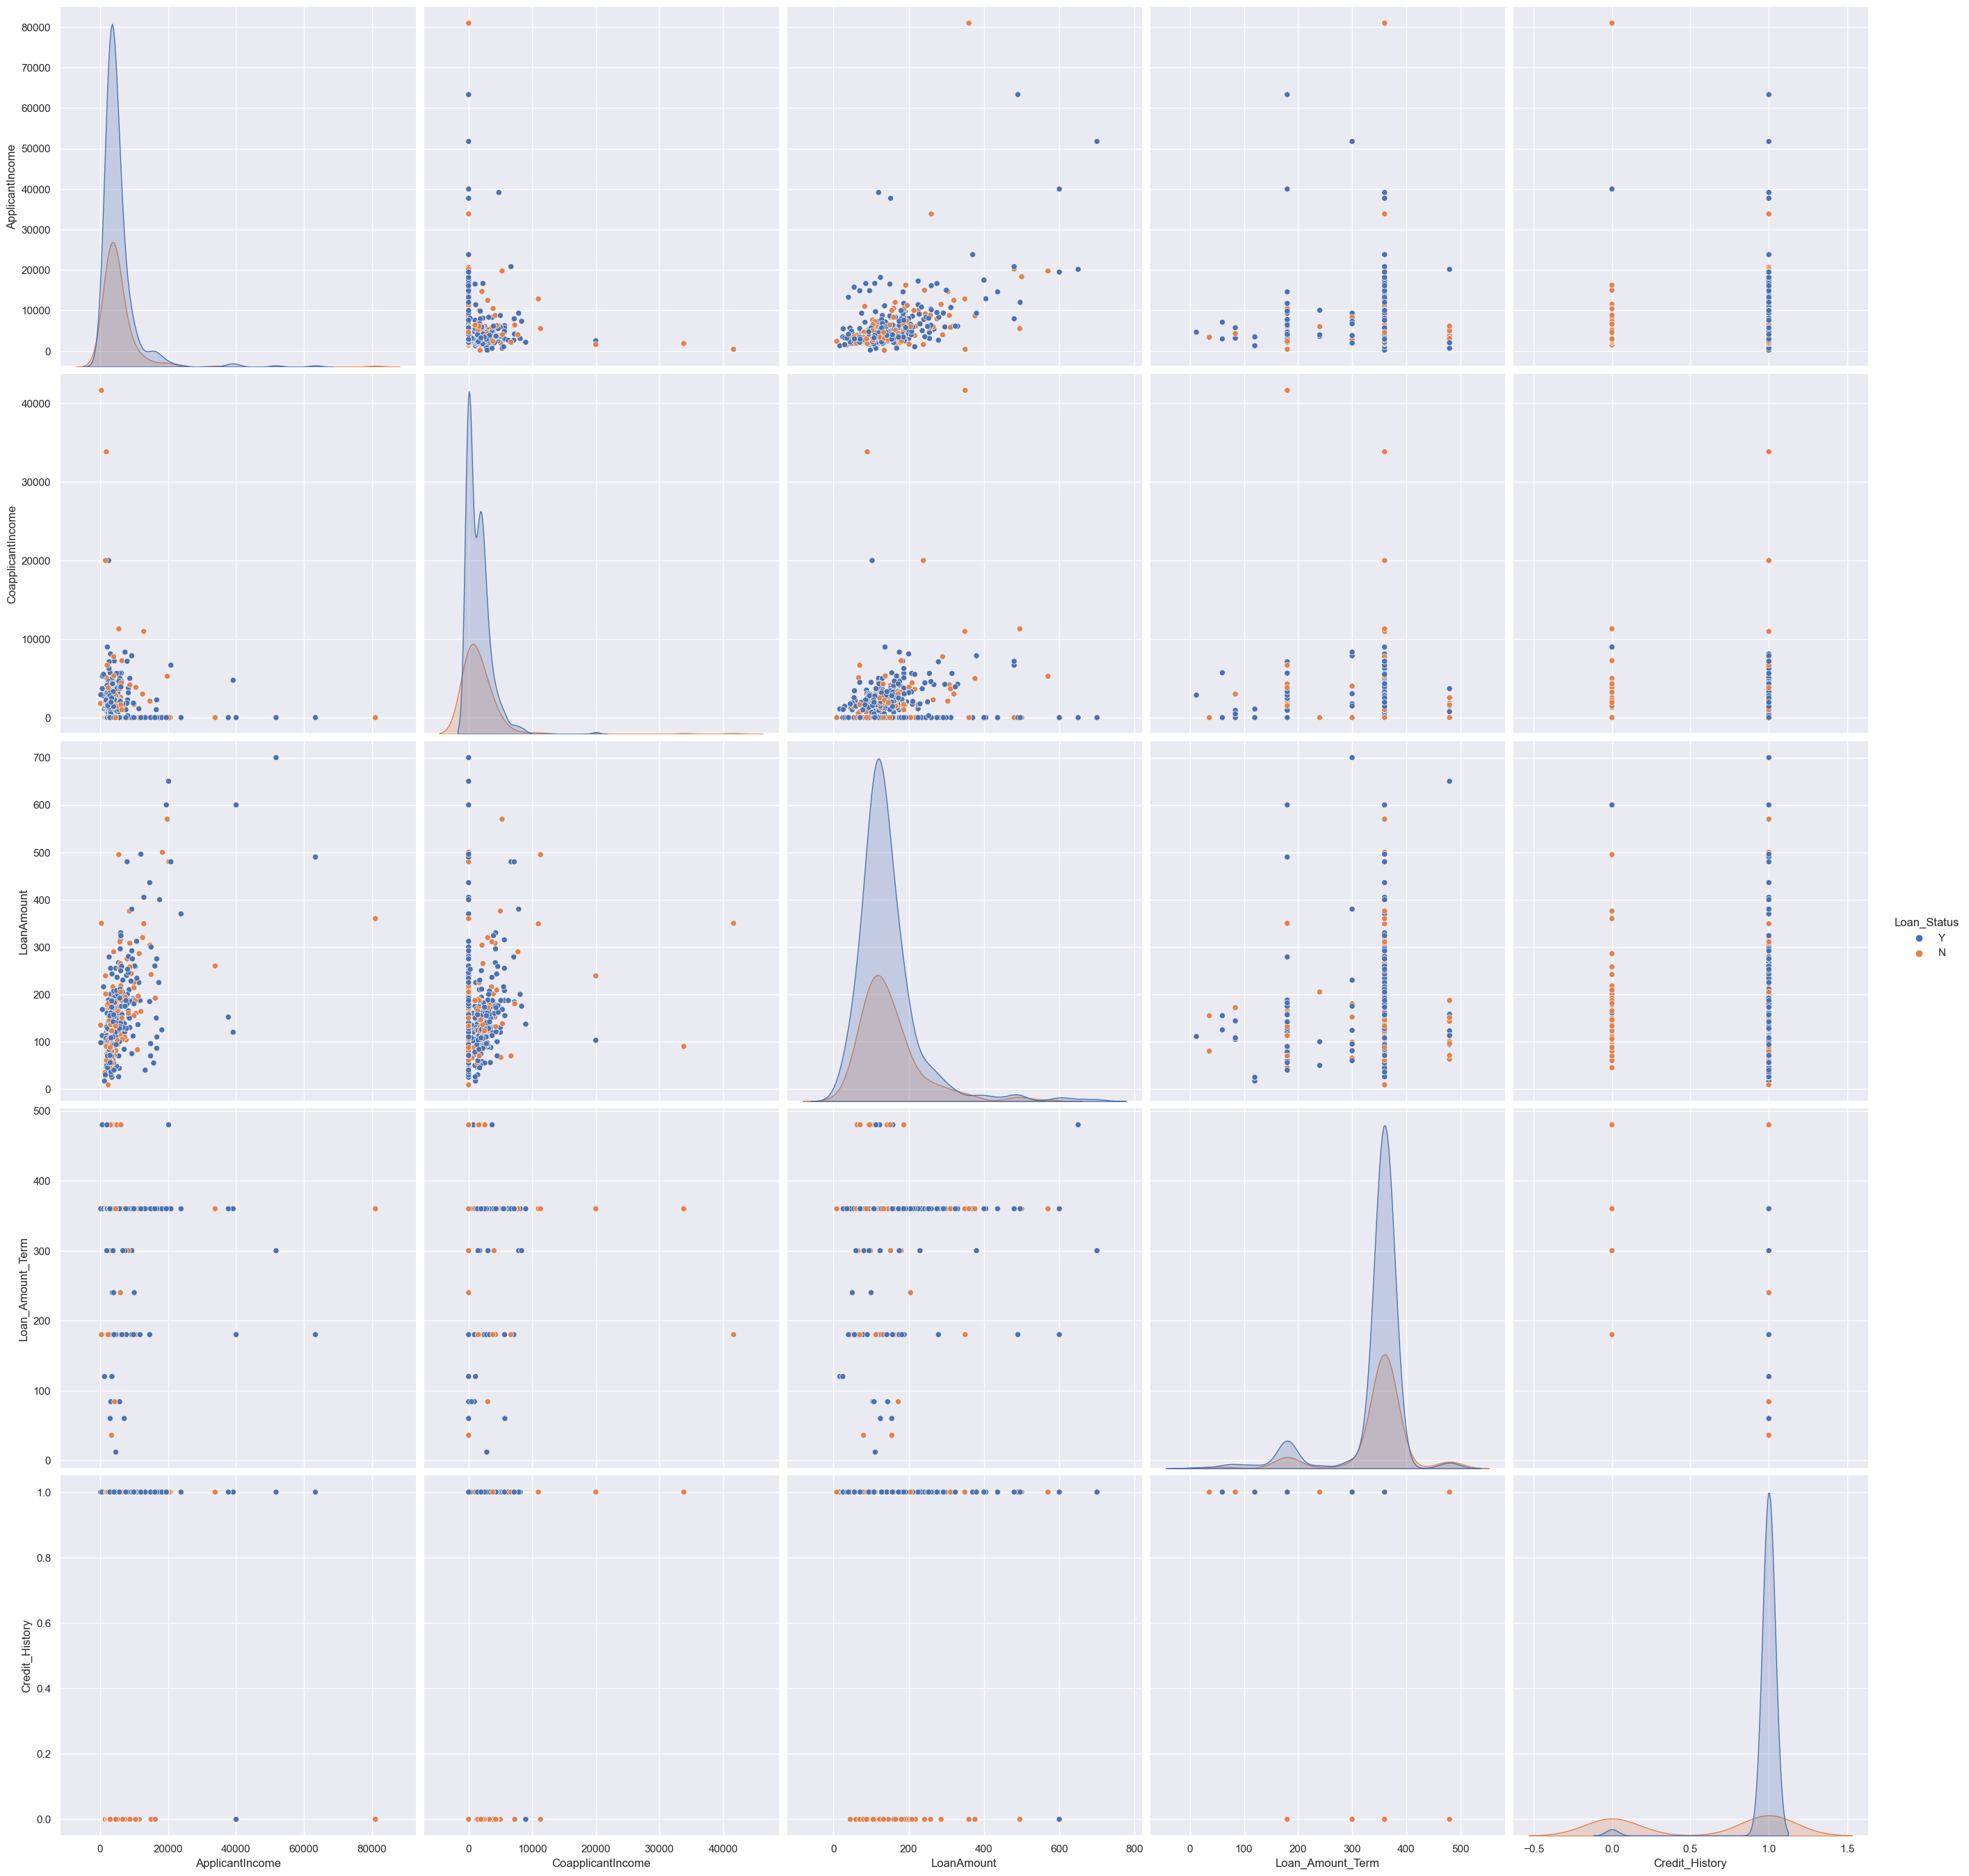

In [89]:
sns.pairplot(df[numerical_variables + target_variable], hue="Loan_Status", height=5.5,diag_kind="kde")

In [90]:
# Compute correlation between numerical columns and Loan_Status
# First, convert Loan_Status to numeric (1 for 'Y', 0 for 'N')
df_tmp = df.copy()
df_tmp['Loan_Status_num'] = df_tmp['Loan_Status'].map({'Y': 1, 'N': 0})

# Select numerical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Compute correlations
target_correlations = df_tmp[numerical_cols + ['Loan_Status_num']].corr()['Loan_Status_num'].drop('Loan_Status_num')
print(target_correlations)

ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Name: Loan_Status_num, dtype: float64


- Based on the correlation output, which single numerical feature has the strongest (highest) correlation with Loan_Status?
- Look at the plot for Credit_History. Does having a Credit_History (value 1.0) seem to have a weak, moderate, or strong association with getting a loan approved?
- In our previous exercise, we saw that Credit_History is missing 50 rows and Gender is missing 13 rows. Which of these missing values is "worse" or "scarier" for our model?

Answers:
- The numerical feature with the strongest correlation with Loan_Status is Credit_History.
- Having a Credit_History seems to have a strong association with getting a loan approved.
- For our model, it is scarier to have 50 missing values in Credit_History, since this feature is the one that has the strongest correlation with the target variable Loan_Status.

### EX4: Analyze Numerical Features

Let's see how `ApplicantIncome` relates to `Loan_Status`.

1.  Create a `seaborn.boxplot` with `x='Loan_Status'` and `y='ApplicantIncome'`.
2.  Give an insight about what you see.
3.  **Extra:** The plot is skewed by outliers. Create a new, filtered DataFrame and plot the boxplot again.

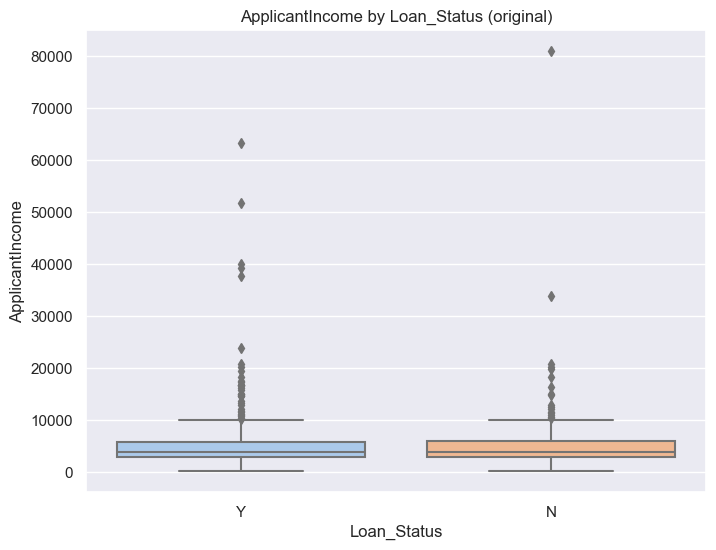

Median ApplicantIncome (original):
Loan_Status
N    3833.5
Y    3812.5
Name: ApplicantIncome, dtype: float64


In [91]:
# Boxplot of ApplicantIncome vs Loan_Status (original data)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='pastel')
plt.title('ApplicantIncome by Loan_Status (original)')
plt.ylabel('ApplicantIncome')
plt.show()

# Print quick statistics / insight
median_orig = df.groupby('Loan_Status')['ApplicantIncome'].median()
print("Median ApplicantIncome (original):")
print(median_orig)

**Insight:** ApplicantIncome is highly skewed with large outliers. The medians for approved (Y) and rejected (N) applicants are similar, indicating ApplicantIncome alone is not a strong separator of Loan_Status.

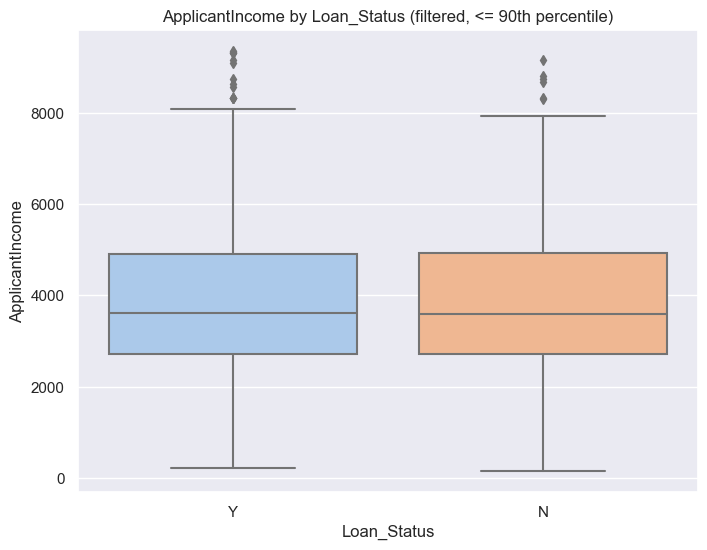

Median ApplicantIncome (filtered):
Loan_Status
N    3585.5
Y    3622.5
Name: ApplicantIncome, dtype: float64


In [92]:
# Extra: remove extreme upper outliers (top 10%) and plot again
cutoff = df['ApplicantIncome'].quantile(0.9)
df_filtered = df[df['ApplicantIncome'] <= cutoff]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df_filtered, palette='pastel')
plt.title(f'ApplicantIncome by Loan_Status (filtered, <= 90th percentile)')
plt.ylabel('ApplicantIncome')
plt.show()

median_filtered = df_filtered.groupby('Loan_Status')['ApplicantIncome'].median()
print("Median ApplicantIncome (filtered):")
print(median_filtered)

After removing the top 10% incomes the distributions become clearer. However, there is still substantial overlap between classes.

### EX5: Check for Missing Values

- How many missing values do we have in each feature?
- How many rows would we end up with if we dropped all rows with at least one missing value?

Use `.isnull().sum()` to find all columns with missing values and print the result.

In [93]:
# Check missing values in each feature (column)
print(df.isnull().sum())

print("\nTotal rows in original dataset:", len(df))
print("Rows remaining after dropping all missing values:", len(df.dropna()))
print(f"Rows that would be lost: {len(df) - len(df.dropna())}")

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Total rows in original dataset: 614
Rows remaining after dropping all missing values: 480
Rows that would be lost: 134


## Part 2: Data Preparation & Feature Engineering

### EX6: Handle Missing Values

We must clean the data before we can train a model.

Inputing values inserts noise to our dataframe since the inputation can be wrong, hence lying to our model.

QUESTION: Is it worth in this situation to impute values or would it be better to just drop the rows?

ANSWER: It would be better to impute missing values. The number of rows that would be lost is significant (as seen in EX5), it would mean to lose nearly the 134 / 614 * 100 = 22% of the original data. Imputing values could introduce noise potentially misleading the model, however it is reasonable to choose this option.

### EX7: Understand, complete and execute the following code


### Handle Missing Values (Categorical)

It's best to impute missing values. For categorical features, we will use the **mode** (the most frequent value).

Steps:
1.  Create a list `cat_cols_with_na` with the names of the *categorical* columns that have missing values.
2.  Loop through this list and fill the `NA` values in `df` with the mode of each column.

In [112]:
# We create a copy to avoid changing the original df
df_processed = df.copy()

In [113]:
### FILL COLUMN LIST
cat_cols_with_na = ['Gender', 'Married', 'Dependents','Self_Employed']

for col in cat_cols_with_na:
    mode_val = df_processed[col].mode()[0]
    df_processed[col] = df_processed[col].fillna(mode_val)
    print(f"Filled NAs in '{col}' with mode: {mode_val}")

Filled NAs in 'Gender' with mode: Male
Filled NAs in 'Married' with mode: Yes
Filled NAs in 'Dependents' with mode: 0
Filled NAs in 'Self_Employed' with mode: No


### Handle Missing Values (Numerical)

For numerical features, we will use the **median** (which is robust to outliers).

1.  Create a list `num_cols_with_na`.
2.  Loop through this list and fill the `NA` values in `df_processed` with the **median** of each column.

In [114]:
### FILL COLUMN LIST
num_cols_with_na = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in num_cols_with_na:
    median_val = df_processed[col].median()
    df_processed[col] = df_processed[col].fillna(median_val)
    print(f"Filled NAs in '{col}' with median: {median_val}")

Filled NAs in 'LoanAmount' with median: 128.0
Filled NAs in 'Loan_Amount_Term' with median: 360.0
Filled NAs in 'Credit_History' with median: 1.0


### EX8: Understand and execute the following code

Let's create a `TotalIncome` feature by combining `ApplicantIncome` and `CoapplicantIncome`.

1.  Create `df_processed['TotalIncome']` by adding the two columns.
2.  Drop the columns that we don't need for the model

In [115]:
df_processed['TotalIncome'] = df_processed['ApplicantIncome'] + df_processed['CoapplicantIncome']

# Drop non needed columns for the model
columns_to_drop = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_ID']
df_processed = df_processed.drop(columns_to_drop, axis=1)

print("Created 'TotalIncome' and dropped original columns.")
df_processed.head()

Created 'TotalIncome' and dropped original columns.


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


### EX9: Convert Target Variable

Machine learning models need numbers, not 'Y' and 'N'.

1.  Map `Loan_Status` to boolean (1 for 'Y' and 0 for 'N').

In [117]:
### YOUR CODE HERE
df_processed['Loan_Status'] = df_processed['Loan_Status'].map({'Y': 1, 'N': 0})

## Part 3: Model Preparation (Split & Scale)

### Understand and execute the following code

1.  Create `X` by dropping `Loan_Status` from `df_final`.
2.  Create `y` with only the `Loan_Status` column.

In [119]:
df_final = df_processed.copy()

In [121]:
y = df_final['Loan_Status']
X = df_final.drop('Loan_Status', axis=1)

Split the Data

1.  `train_test_split` to create `X_train`, `X_test`, `y_train`, `y_test`.
2.  `test_size=0.2`, `random_state=42`, and **`stratify=y`** (important for imbalanced datasets).

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (491, 10)
X_test shape: (123, 10)
y_train shape: (491,)
y_test shape: (123,)


### One-Hot Encode Categorical Features

Models can't understand text like 'Male', 'Urban', etc. We need to convert them to dummy variables.

1.  `Credit_History` is 1.0/0.0, but should be treated as categorical. Convert it to `str` type: `df_processed['Credit_History'] = df_processed['Credit_History'].astype(str)`
2.  Get a list of all `object` type columns: `categorical_cols = df_processed.select_dtypes(include=['object']).columns`
3.  Use `pd.get_dummies()` on `df_processed`, passing the `categorical_cols` to the `columns` argument, and set `drop_first=True` (to avoid multicollinearity).
4.  Store the result in a new DataFrame `df_final`.

In [126]:
df_processed['Credit_History'] = df_processed['Credit_History'].astype(str)
categorical_cols = df_processed.select_dtypes(include=['object']).columns
df_final = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

### Feature Scalling

Logistic Regression is sensitive to feature scales. We must scale our data as we did in previous labs.

In [127]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numeric_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome']


# Train SCALER (numeric columns only)
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

# Train ENCODER (categoric columns only)
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
encoder.fit(X_train[categorical_cols])

# Transform from the encoder trained
X_train_scaled_data = scaler.transform(X_train[numeric_cols])
df_train_scaled = pd.DataFrame(X_train_scaled_data, columns=numeric_cols, index=X_train.index)

X_train_encoded_data = encoder.transform(X_train[categorical_cols])
encoded_col_names = encoder.get_feature_names_out(categorical_cols)
df_train_encoded = pd.DataFrame(X_train_encoded_data, columns=encoded_col_names, index=X_train.index)

# Concat all features
X_train_processed_df = pd.concat([df_train_scaled, df_train_encoded], axis=1)

# Store the model columns
model_columns_ordered = X_train_processed_df.columns.tolist()

print(f"Número total de columnes del model: {len(model_columns_ordered)}")
print("Llista de columnes del model:", model_columns_ordered)
display(X_train_processed_df.head())

Número total de columnes del model: 13
Llista de columnes del model: ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']


,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
154,-1.131588,0.280691,0.397516,-0.575168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
239,-0.592309,0.280691,0.397516,-0.566044,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
448,0.040758,0.280691,-2.515623,-0.306544,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
471,-0.393010,-2.486768,-2.515623,-0.440706,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
273,0.040758,0.280691,0.397516,-0.337505,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### IMPORTANT

The .fit() and .transform() steps for the scalers and encoders are done separately. This is because we .fit() them on our training data and then store these same fitted objects (e.g., in a pickle file) for our Streamlit app. The app will then use these fitted objects to .transform() new user input.

The .fit() step is done only on the train data (X_train) to prevent data leakage.

- Data Leakage is when information from your test set (which is supposed to be "unseen") leaks into your training process.

- If we .fit() the scaler on the entire dataset, it would learn the mean and standard deviation of the test data. If we fit the encoder on the entire dataset, it would learn all possible categories from the test data.

- This is "cheating." It gives our model information about the future, leading to falsely optimistic performance scores (like high accuracy) in our notebook.

- When the model goes live (in the Streamlit app) and sees truly new data, its performance will be much worse than we expected. By fitting only on X_train, we simulate this real-world scenario and get a true, reliable score.

## Part 4: Train the model

In [128]:
def train_logistic_regression(X_train, y_train):
    """
    Train a Logistic Regression model on the training data.
    We use class_weight='balanced' to handle imbalance.
    """
    # Initialize the Logistic Regression model
    model = LogisticRegression(random_state=42, class_weight='balanced')
    
    # Train the model
    model.fit(X_train, y_train)
    
    return model

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def density_chart(data, label, class_names, model, cutoff=0.5):
    """
    Plots a density chart of the predicted probabilities for each class.
    """
    # Get the probabilities for each class
    probabilities = model.predict_proba(data)
    
    # Get the probability of the positive class (class 1)
    prob_positive = probabilities[:, 1]
    
    # Create a DataFrame for plotting
    df_plot = pd.DataFrame({'Probability': prob_positive, 'Label': label})
    
    # Plot the density chart
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_plot, x='Probability', hue='Label', common_norm=False, fill=True, palette='coolwarm')
    
    # Customize the plot
    plt.title('Density Chart of Predicted Probabilities', fontsize=16)
    plt.xlabel('Predicted Probability', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(title='Actual Label', labels=class_names)
    plt.axvline(x=cutoff, color='red', linestyle='--', label=f'Cut-off ({cutoff})')
    plt.legend()
    plt.show()

def evaluate_model_at_cutoff(model, X_test, y_test, cutoff=0.5):
    """
    Evaluates a model at a specific probability cutoff.
    
    It calculates predictions, prints a classification report,
    and calls the 'density_chart' and 'plot_confusion_matrix' functions.
    """
    class_names=['Rejected (0)', 'Approved (1)']
    
    # 1. Get probability of positive class (class 1)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # 2. Generate predictions based on the custom cutoff
    y_pred = (y_prob >= cutoff).astype(int)
    
    print(f"      EVALUATION REPORT AT CUT-OFF = {cutoff}      ")
    
    # 3. Print the classification report
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # 4. Call the density_chart function
    # Aquesta funció ja crea la seva pròpia figura
    print("\n--- Probability Density Plot ---")
    density_chart(data=X_test, 
                  label=y_test, 
                  class_names=class_names, 
                  model=model, 
                  cutoff=cutoff)
    
    # 5. Calculate and plot the confusion matrix
    print(f"\n--- Confusion Matrix (at Cut-off = {cutoff}) ---")
    
    # Calculate the cm
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a new figure for the confusion matrix
    plt.figure(figsize=(6, 5))
    plot_confusion_matrix(cm=cm, 
                          classes=class_names, 
                          title=f'Confusion Matrix (Cut-off = {cutoff})')
    plt.show()

### EX10: Execute - Train Logistic Regression

1.  Call the `train_logistic_regression` function with your scaled training data to create `model_lr`.

In [129]:
### your code here
model_lr = train_logistic_regression(X_train_processed_df, y_train)
print(model_lr)

LogisticRegression(class_weight='balanced', random_state=42)


### Model evaluation - Predict the test set

First, we need to encode and scale the data as we did with the train set:

In [130]:
# Scale numeric cols
X_test_scaled_data = scaler.transform(X_test[numeric_cols])

df_test_scaled = pd.DataFrame(X_test_scaled_data, 
                            columns=numeric_cols, 
                            index=X_test.index) # Mantenim l'índex per al concat

# Encode categorical cols
X_test_encoded_data = encoder.transform(X_test[categorical_cols])

encoded_col_names = encoder.get_feature_names_out(categorical_cols)
df_test_encoded = pd.DataFrame(X_test_encoded_data, 
                             columns=encoded_col_names, 
                             index=X_test.index) # Mantenim l'índex per al concat

# Concat both dataframes horizontally
X_test_processed_df = pd.concat([df_test_scaled, df_test_encoded], axis=1)

# Reorder cols (we need the same order as in training)
X_test_processed_df = X_test_processed_df[model_columns_ordered]

print("Dades de X_test processades correctament.")
display(X_test_processed_df.head())

Dades de X_test processades correctament.


,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
150,-0.334393,0.280691,-2.515623,-0.123025,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.415908,0.280691,0.397516,-0.091765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
598,0.392461,0.280691,0.397516,0.428282,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
235,0.275227,0.280691,0.397516,-0.050783,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
145,-0.545415,0.280691,0.397516,-0.042408,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### EX11: Evaluate Logistic Regression

1.  Call the function evaluate_model_at_cutoff() with the requested params
2.  Question: Which are the main steps of this function?

Answer:
- Get predicted probabilities for the positive class
- Generate predictions based on the cutoff
- Print classification report (precision, recall, f1-score)
- Plot probability density chart for each class
- Calculate and plot confusion matrix

      EVALUATION REPORT AT CUT-OFF = 0.5      

--- Classification Report ---
              precision    recall  f1-score   support

Rejected (0)       0.74      0.74      0.74        38
Approved (1)       0.88      0.88      0.88        85

    accuracy                           0.84       123
   macro avg       0.81      0.81      0.81       123
weighted avg       0.84      0.84      0.84       123


--- Probability Density Plot ---


c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


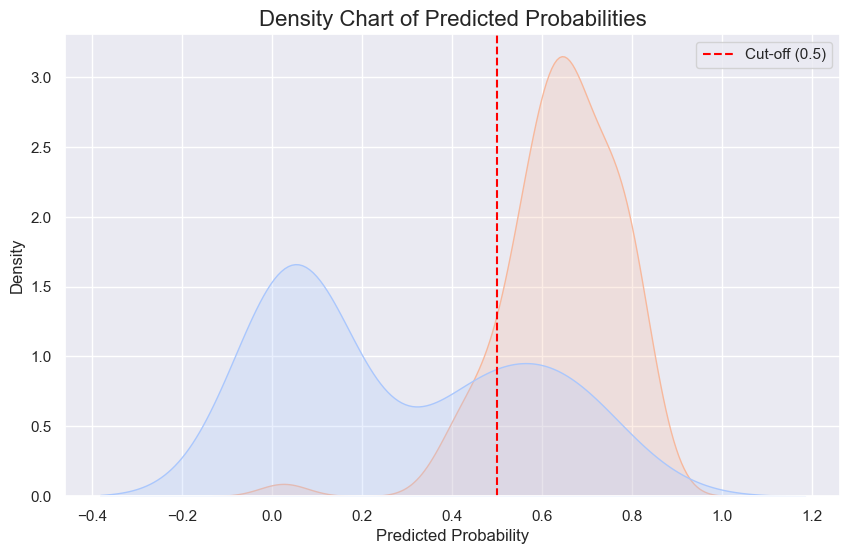


--- Confusion Matrix (at Cut-off = 0.5) ---
Confusion matrix, without normalization


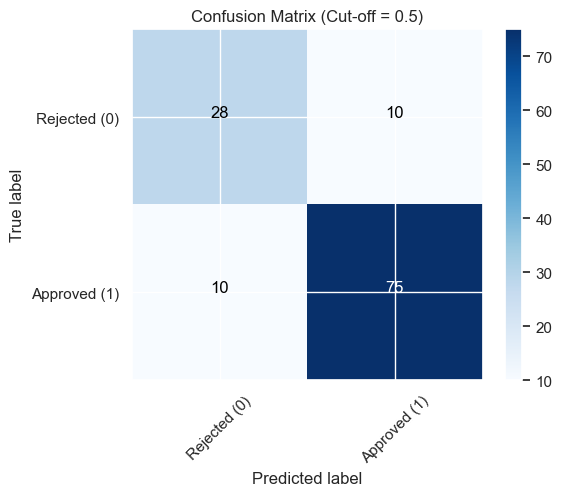

In [134]:
evaluate_model_at_cutoff(model_lr, X_test_processed_df, y_test, cutoff=0.5)

### EX12: Interpret Logistic Regression Coefficients

A huge advantage of Logistic Regression is its interpretability.

1.  Create a `pd.DataFrame` to store the `model_lr.coef_[0]` and the `X.columns`.
2.  Sort the DataFrame by the coefficient value (descending) and display it.
3.  Which feature is the most important positive predictor? Which is a strong negative predictor?

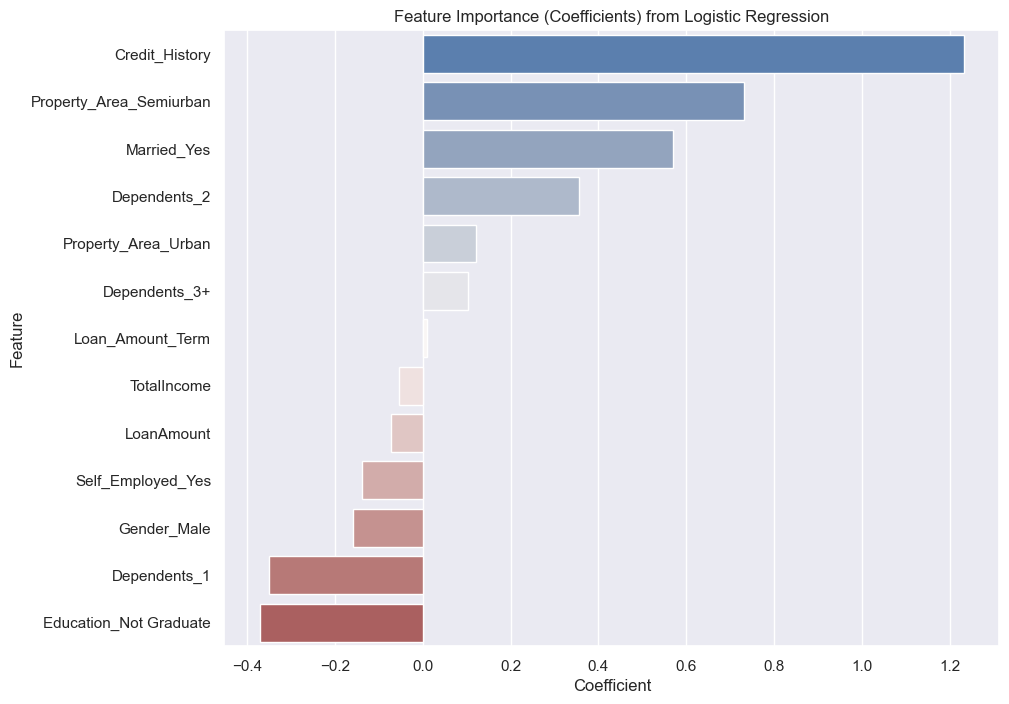

,Feature,Coefficient
2,Credit_History,1.233014
11,Property_Area_Semiurban,0.730892
5,Married_Yes,0.568836
7,Dependents_2,0.356211
12,Property_Area_Urban,0.120489
8,Dependents_3+,0.102964
1,Loan_Amount_Term,0.009165
3,TotalIncome,-0.054848
0,LoanAmount,-0.073613
10,Self_Employed_Yes,-0.138472


In [135]:
coefficients = pd.DataFrame({
    'Feature': model_columns_ordered,
    'Coefficient': model_lr.coef_[0]
})

coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='vlag')
plt.title('Feature Importance (Coefficients) from Logistic Regression')
plt.show()

display(coefficients)

**Answer:** The most important positive predictor is the feature Credit_History, as we have studied in previous exercises by looking at the correlation. The strongest negative predictor corresponds to the feature Education_Not Graduate.

### EX13: Business Scenario 1 (Conservative Bank)

**Goal:** Be very conservative and **minimize risk**. We want to avoid approving bad loans.

1.  Which are the 'bad loans'? TP, FP, TN, FN?
2.  What do we want to maximize here? (answer with a metric)
3.  What do we have to do with the cutoff to increase the answer 2 metric?
4.  Play with the following cell, define the best cutoff (aprox) and analyze: What happened to Recall? What happened to Precision?

Answers:
- Bad loans are False Positives (FP), where we predict approval but should not be approved loans.
- We want to maximize precision to minimize risk.
- To increase precision, we need to increase the cutoff threshold. A higher cutoff means more strictness about loan approval.

      EVALUATION REPORT AT CUT-OFF = 0.7      

--- Classification Report ---
              precision    recall  f1-score   support

Rejected (0)       0.40      0.95      0.56        38
Approved (1)       0.94      0.35      0.51        85

    accuracy                           0.54       123
   macro avg       0.67      0.65      0.54       123
weighted avg       0.77      0.54      0.53       123


--- Probability Density Plot ---


c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


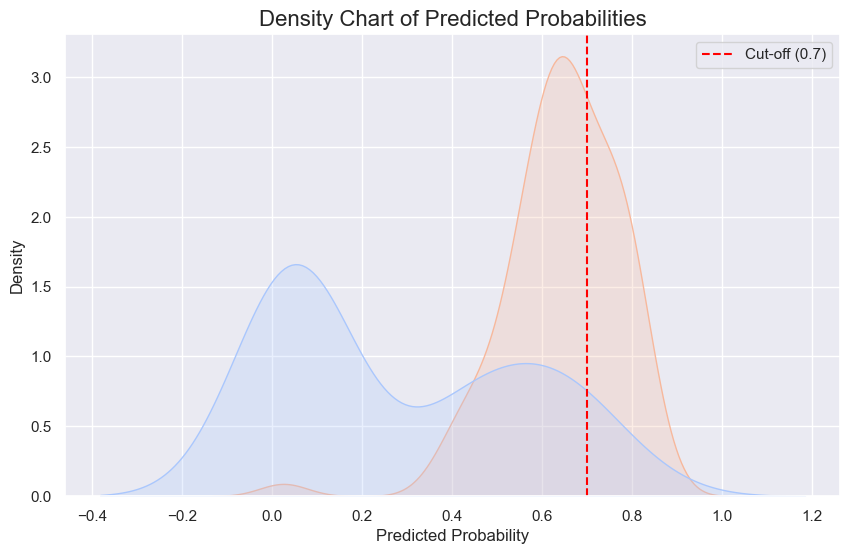


--- Confusion Matrix (at Cut-off = 0.7) ---
Confusion matrix, without normalization


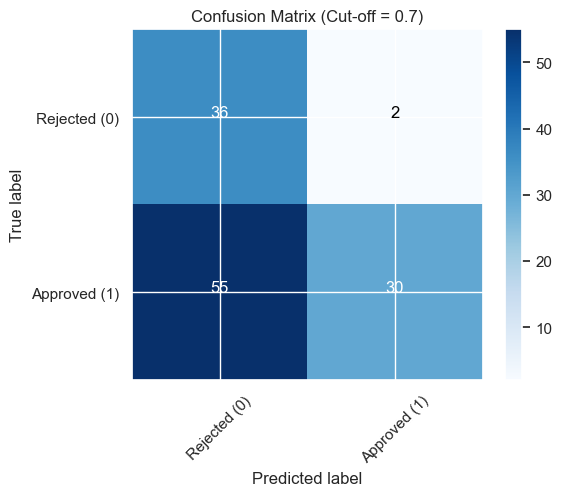

In [141]:
new_threshold_recall = 0.7

evaluate_model_at_cutoff(model_lr, X_test_processed_df, y_test, cutoff=new_threshold_recall)

We can see there is a significant difference between the confusion matrices when changing the cutoff value. When increasing it, we can observe that the number of False Positives reduces significantly keeping a balance between True Positives and True Negatives.
Regarding the cutoff = 0.5, recall and precision have decreased.

### EX14: Business Scenario 2 (Aggressive Growth)

**Goal:** Aggressive growth. We want to **capture as many good customers as possible**. We are willing to accept a little more risk to avoid missing opportunities.

1.  What do we want to maximize here? (answer with a metric and justify your answer)
2.  What do we have to do with the cutoff to increase the answer 1 metric?
3.  Play with the following cell, define the best cutoff (aprox) and analyze: What happened to Recall? What happened to Precision?

In [ ]:
Answers:
- We want to maximize recall (specifically, recall for the approved loans class). This means we want to identify as many truly good customers as possible, even if it means accepting a few more risky loans. High recall ensures we minimize false negatives (missed good customers).
- To increase recall, we need to lower the cutoff threshold. This makes the model more likely to approve loans, increasing the number of true positives (but also potentially increasing false positives).

      EVALUATION REPORT AT CUT-OFF = 0.3      

--- Classification Report ---
              precision    recall  f1-score   support

Rejected (0)       0.95      0.55      0.70        38
Approved (1)       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


--- Probability Density Plot ---


c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PORT_CINTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


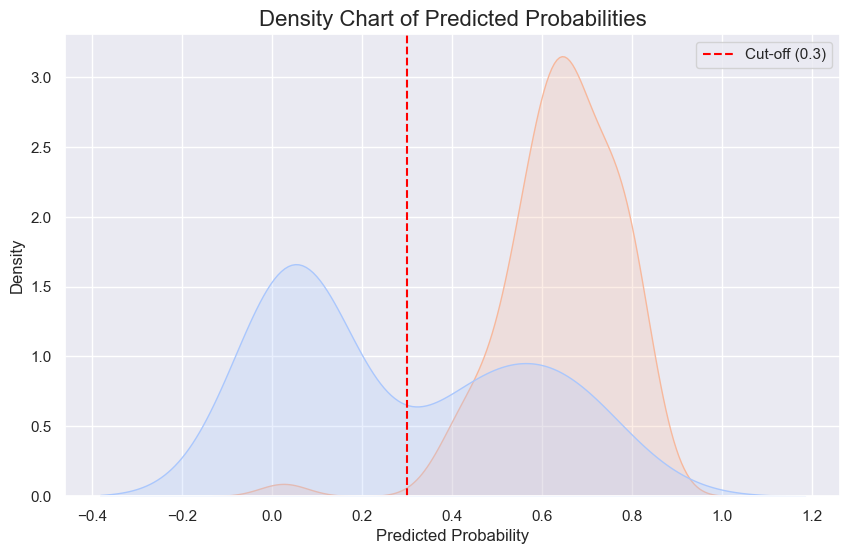


--- Confusion Matrix (at Cut-off = 0.3) ---
Confusion matrix, without normalization


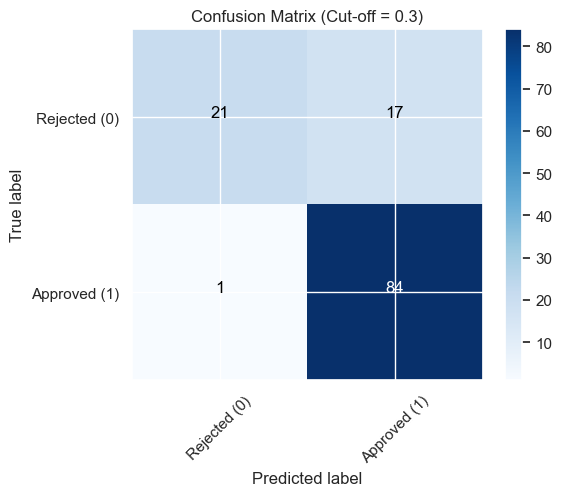

In [145]:
new_threshold_recall = 0.3

evaluate_model_at_cutoff(model_lr, X_test_processed_df, y_test, cutoff=new_threshold_recall)

If you lower the cutoff (e.g., to 0.3 or 0.4), recall increases and precision too.

### EX15: Our current models are relatively straightforward. Briefly describe two or three techniques you would try next to improve the model's performance.

Answer:
- Try more complex models like Random Forest, which can capture non-linear relationships.
- Perform hyperparameter tuning to optimize model settings.
- Engineer new features or interactions and address class imbalance with techniques like class weighting.

### EX16: Looking at our EDA and model performance, what do you believe is the single biggest factor limiting our model's accuracy?

Answer:
The single biggest factor limiting accuracy is the strong class imbalance and the dominant influence of Credit_History, which may overshadow other features and make the model less generalizable.

### EX17: Consider two new applicants. Based on your interpretation of the model's coefficients (from Exercise 6.2), which applicant is more likely to be approved, and why?
- Applicant A: Has a Credit_History = 1.0, is Married, and lives in a Semiurban area.
- Applicant B: Has a Credit_History = 0.0, is Not Graduate, and is Self_Employed

Note: I believe there was a mistake when defining the exercise. It should relate to exercise 12 instead of exercise 6.2.

Answer: Applicant A is more likely to be approved because it has the three attributes that have the highest coefficient.

## PART 5. Communicating results through a Visual Analytics web tool.

We are ready to share our results with our Consultant team and customers. To do it, we will create a Data product using the Streamlit framework. This web app should have a least 2 tabs: one for data exploration and other for salary prediction.

Before building this app, you should store the ML model and labencoders in a **pickle** format as follows. This pickle file will be the one you need to call in your web app.

In [146]:
import pickle

In [147]:
data = {
    "model": model_lr,
    "encoder": encoder,
    "scaler": scaler,
    "numeric_cols": numeric_cols,
    "categorical_cols": categorical_cols,
    "model_columns_ordered": model_columns_ordered,
}
with open('loan_app_artifacts.pkl', 'wb') as file:
    pickle.dump(data, file)

You can verify the pickle file works as follows: first, open the file storing into 3 variables the regressor, the labencoder for country and the labencoder for education.

In [148]:
with open('loan_app_artifacts.pkl', 'rb') as file:
    data = pickle.load(file)

model_loaded = data["model"]
encoder_loaded = data["encoder"]
scaler_loaded = data["scaler"]
numeric_cols_loaded = data["numeric_cols"]
categorical_cols_loaded = data["categorical_cols"]
model_columns_ordered_loaded = data["model_columns_ordered"]

You can also make a prediction with a sample as follows:

In [149]:
raw_columns = ['LoanAmount', 'Loan_Amount_Term', 'TotalIncome', 
               'Gender', 'Married', 'Dependents', 
               'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

sample_data = [[
    150.0,       # LoanAmount
    360.0,       # Loan_Amount_Term
    8000.0,      # TotalIncome
    'Male',      # Gender
    'Yes',       # Married
    '0',         # Dependents (recorda que era un 'object', per això va com a string)
    'Graduate',  # Education
    'No',        # Self_Employed
    1.0,         # Credit_History (float, 1.0 o 0.0)
    'Semiurban'  # Property_Area
]]

sample_df = pd.DataFrame(sample_data, columns=raw_columns)
display(sample_df)

,LoanAmount,Loan_Amount_Term,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,150.0,360.0,8000.0,Male,Yes,0,Graduate,No,1.0,Semiurban


In [150]:
# Normalize as in training

# Scale numeric cols
sample_df_scaled_data = scaler.transform(sample_df[numeric_cols_loaded])

df_sample_scaled = pd.DataFrame(sample_df_scaled_data, 
                            columns=numeric_cols_loaded, 
                            index=sample_df.index) # Mantenim l'índex per al concat

# Encode categorical cols
sample_df_encoded_data = encoder.transform(sample_df[categorical_cols_loaded])

encoded_col_names = encoder.get_feature_names_out(categorical_cols_loaded)
df_sample_encoded = pd.DataFrame(sample_df_encoded_data, 
                             columns=encoded_col_names, 
                             index=sample_df.index) # Mantenim l'índex per al concat

# Concat both dataframes horizontally
sample_df_processed_df = pd.concat([df_sample_scaled, df_sample_encoded], axis=1)

# Reorder cols (we need the same order as in training)
sample_df_processed_df = sample_df_processed_df[model_columns_ordered]

print("Dades de sample_df processades correctament.")
display(sample_df_processed_df.head())

Dades de sample_df processades correctament.


,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.040758,0.280691,0.397516,0.13468,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
MY_CUTOFF = 0.5

# Predict with our cutoff
(model_loaded.predict_proba(sample_df_processed_df)[:, 1] >= MY_CUTOFF).astype(int)

array([1])

Now, you are ready to go to next step: building the Visual Analytics tool based on Streamlit. Recall, your app should have a main .py file (for instante, **my_app.py**) and a folder called **pages** with all .py files you want to show in your app.